In [9]:
%load_ext autoreload
%autoreload 2

import os
import sys

%store -r DISCO_ROOT_FOLDER
if "DISCO_ROOT_FOLDER" in globals():
    os.chdir(DISCO_ROOT_FOLDER)
    sys.path.append(DISCO_ROOT_FOLDER)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import matplotlib.pyplot as plt
import numpy as np

from clustpy.utils import plot_2d_data, plot_with_transformation

from data._metrics import *
from data.densired_datasets import Datasets as DensiredDatasets

[(-1, 500), (0, 188), (1, 297), (2, 1009), (3, 15), (4, 375), (5, 500), (6, 294), (7, 1018), (8, 322), (9, 482)]


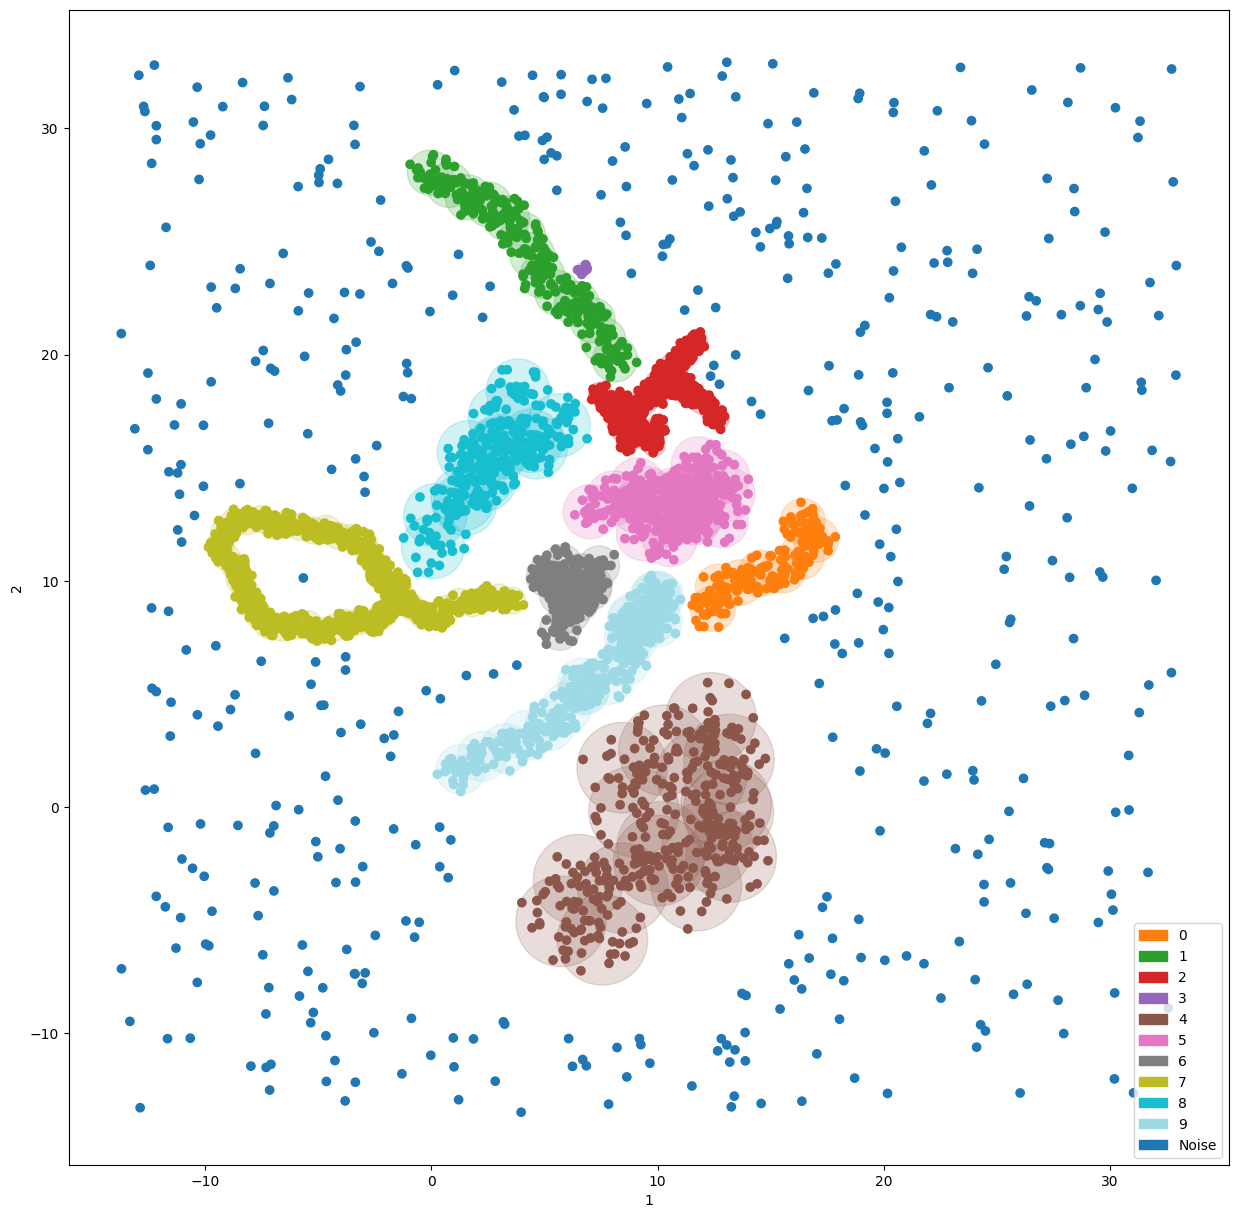

In [11]:
X, l, skeleton, data = DensiredDatasets.DatasetDensiredExample.original_data

print([(int(c_id), len(X[l == c_id])) for c_id in np.sort(list(set(l)))])
skeleton.verbose = True
skeleton.display_data(data, show_radius=True, show_core=False)

In [12]:
X, l = DensiredDatasets.DatasetDensiredExample.data

plt.figure(figsize=(5, 5))
color = plt.cm.tab20(np.linspace(0, 1, len(set(l))))
for c_id in np.sort(list(set(l))):
    plt.scatter(X[:, 0][l == c_id], X[:, 1][l == c_id], s=5, color=color[int(c_id) + 1], label=int(c_id))
legend = plt.legend(
    loc="center left",
    bbox_to_anchor=(1, 0.5),
)

Dataset1


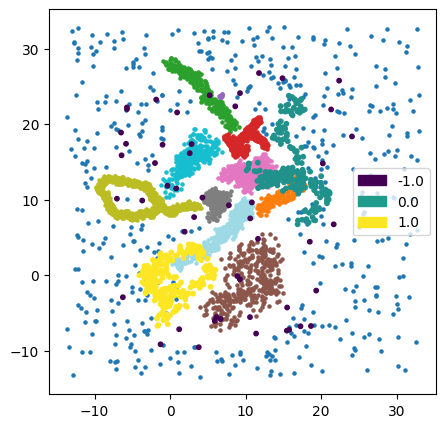

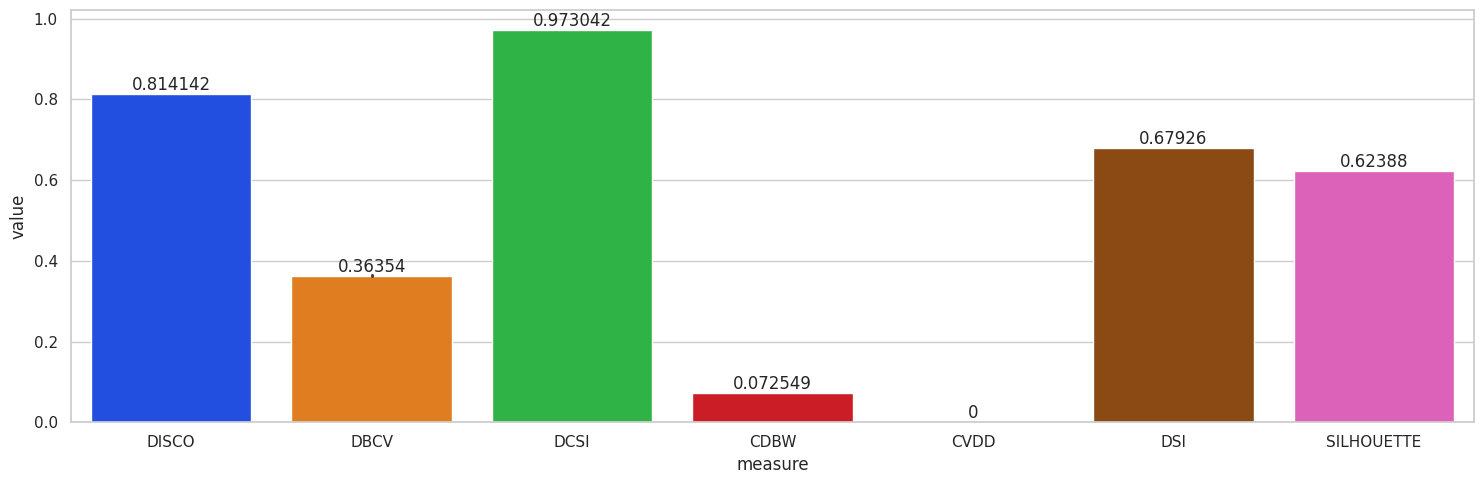

Dataset2


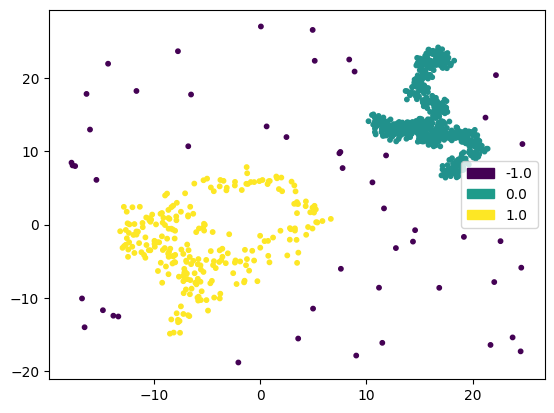

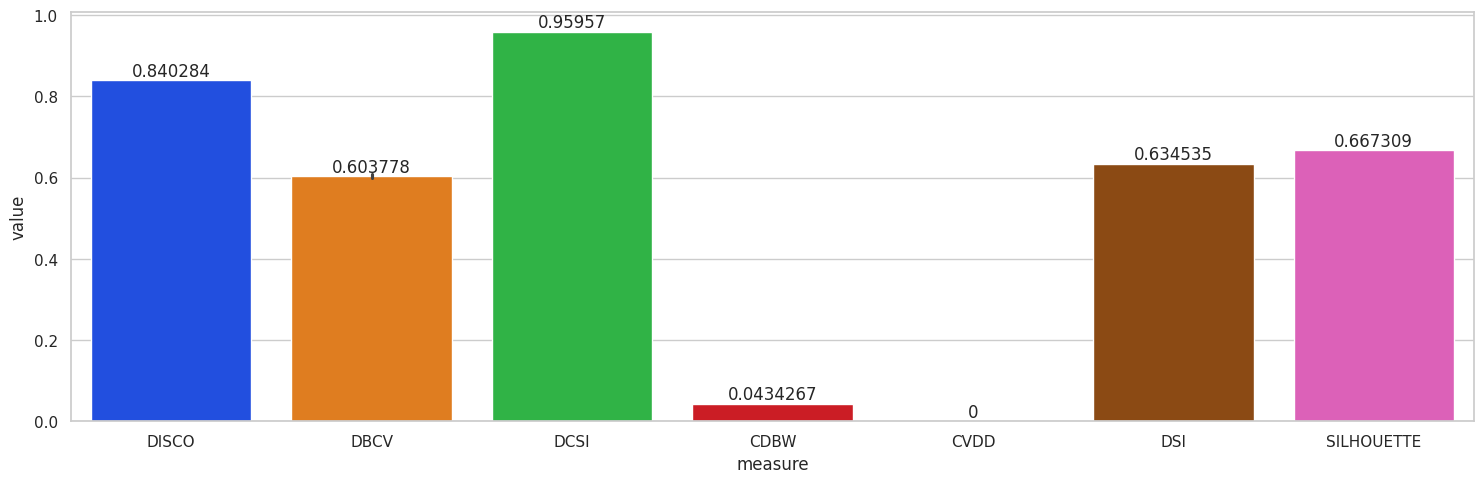

DatasetDensiredExample


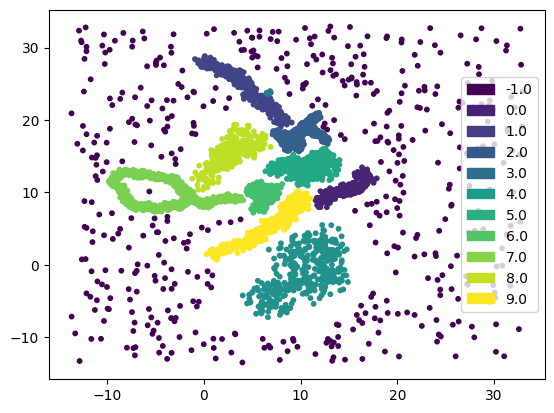

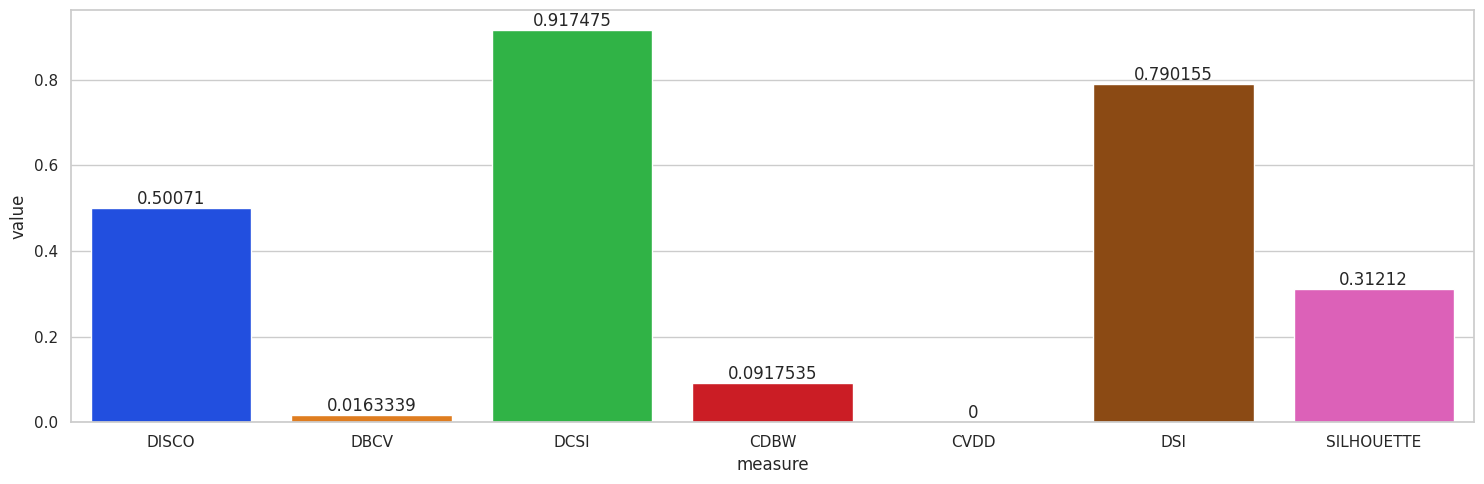

In [13]:
import pandas as pd
from data._util_experiments import cache, calc_eval_measures
from data._util_plots import plot_barplot
from data._metrics import create_and_filter_df

def calc():
    eval_results = {}
    for dataset in DensiredDatasets:
        print("Calc", dataset.name)
        X, l = dataset.data
        eval_results[dataset.name] = calc_eval_measures(X, l, name=dataset.name)
    return eval_results

eval_results = cache("DensiredDatasets", calc)


for dataset in DensiredDatasets:
    print(dataset.name)
    X, l = dataset.data
    plot_2d_data(X, l)
    plt.show()

    df = create_and_filter_df(eval_results[dataset.name])
    plot_barplot(df, "measure", "value", "measure")
    plt.show()